In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from scipy import interp


df = pd.read_csv(r"C:\Users\c15167771\Desktop\CS4055Assignment\googleplaystore.csv")

In [2]:
df.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [4]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10840,10840,9366.000000,1.084000e+04,10840,10840,10839,10840,10840,10840,10840,10832,10838
unique,9659,33,NaN,NaN,461,21,2,92,6,119,1377,2783,33
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,NaN,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.191757,4.441529e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.515219,2.927761e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,5.477550e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Candy Crush Saga                                      7
8 Ball Pool                                           7
Duolingo: Learn Languages Free                        7
Bleacher Report: sports news, scores, & highlights    6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Bubble Shooter                                        6
Zombie Catchers                                       6
Subway Surfers                                        6
slither.io                                            6
Helix Jump                                            6
Temple Run 2                                          6
Bowmasters                                            6
Nick                                                  6
Zombie Tsunami                                        5
Netflix                                         

In [6]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [7]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.5M                    68
2.3M                    68
                      ... 
25k                      1
811k                     1
980k                     1
642k                     1
383k                     1
293k                     1
1

In [8]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [9]:
df['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$3.49          7
$7.99          7
$24.99         7
$29.99         7
$19.99         6
$5.49          6
$12.99         5
$8.99          5
$11.99         5
$6.49          5
$2.00          3
$10.00         3
$1.00          3
$16.99         3
$3.95          2
$1.70          2
           ...  
$1.61          1
$4.60          1
$400.00        1
$74.99         1
$200.00        1
$2.60          1
$3.02          1
$3.04          1
$2.95          1
$154.99        1
$3.28          1
$4.59          1
$1.29          1
$89.99         1
$4.85          1
$3.61          1
$1.26          1
$19.90         1
$389.99        1
$5.00          1
$2.56          1
$1.20          1
$19.40         1
$1.96          1
$379.99        1
$3.88          1
$1.97          1
$28.99        

In [10]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [11]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

In [12]:
df['Last Updated'].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
July 25, 2018         164
July 26, 2018         161
August 6, 2018        158
July 27, 2018         151
July 24, 2018         148
July 23, 2018         127
July 16, 2018         126
July 19, 2018         126
July 18, 2018         123
July 11, 2018         106
August 4, 2018        105
July 12, 2018         103
July 5, 2018           93
July 17, 2018          92
July 3, 2018           90
July 9, 2018           89
July 20, 2018          88
July 13, 2018          81
May 24, 2018           69
June 27, 2018          63
July 6, 2018           63
June 26, 2018          60
May 25, 2018           56
June 25, 2018          56
June 13, 2018          54
                     ... 
November 9, 2014        1
July 7, 2015            1
January 17, 2012        1
October 29, 2014        1
August 10, 2013         1
March 31, 2015          1
February 17, 2014       1
April 11, 20

In [13]:
df['Current Ver'].value_counts()

Varies with device    1459
1                      842
1.1                    276
1.2                    185
2                      165
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     93
1.5                     84
1.0.2                   80
2.1                     67
3                       66
1.6                     66
1.0.3                   62
1.0.4                   58
1.7                     54
2.0.0                   51
1.0.5                   50
1.1.0                   49
1.1.1                   48
1.0.6                   47
1.2.1                   46
4                       44
1.2.0                   43
1.8                     42
1.9                     37
2.3.2                   35
2.4                     35
2.2                     35
                      ... 
1.0-a22936.127           1
7.0.0                    1
2.5.1.7592               1
5.51                     1
10.9.8 (Play)            1
4.0.14                   1
4

In [14]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

In [15]:
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [16]:
df['Reviews'].value_counts()

0          596
1          272
2          214
3          175
4          137
5          108
6           97
7           90
8           74
9           65
10          64
12          60
11          52
13          49
17          48
14          41
19          41
21          35
20          35
16          35
15          31
25          30
30          30
24          30
38          29
18          27
22          26
27          25
23          25
33          24
          ... 
4303         1
94427        1
18652        1
522466       1
32997        1
3213548      1
3016297      1
59632        1
66033        1
28835        1
858230       1
63650        1
26744        1
24697        1
8190074      1
428156       1
39038        1
41089        1
2180         1
7801         1
5234825      1
1048766      1
407698       1
12435        1
24729        1
155693       1
12443        1
163997       1
37023        1
1385093      1
Name: Reviews, Length: 6001, dtype: int64

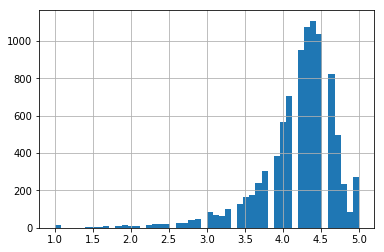

In [17]:
df['Rating'].hist(bins=50)

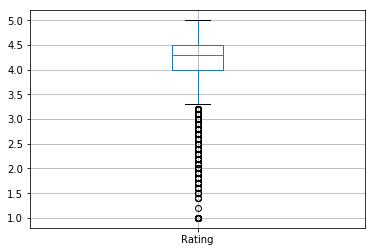

In [18]:
df.boxplot(column='Rating')

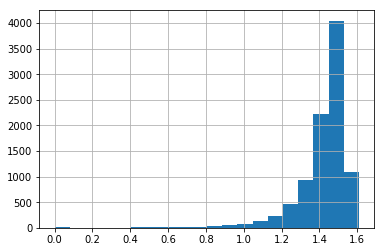

In [19]:
df['Rating_log'] = np.log(df['Rating'])
df['Rating_log'].hist(bins=20)

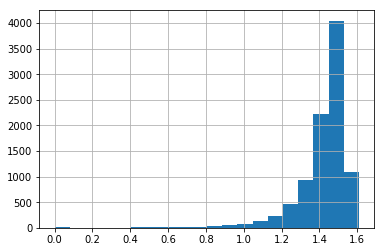

In [20]:
df['TotalRating'] = df['Rating'] 
df['TotalRating_log'] = np.log(df['TotalRating'])
df['Rating_log'].hist(bins=20) 

In [21]:
# Data Munging and Changing rows to numeric values
df["Reviews"].fillna("0",inplace=True)

df["Type"].fillna("Free",inplace=True)

df["Rating"].fillna(np.mean(df["Rating"]),inplace=True)

df["Content Rating"].fillna("Everyone",inplace=True)

df["Current Ver"].fillna("1.0",inplace=True)

df["Size"].fillna("Varies with device",inplace=True)

df["Android Ver"].fillna(df["Android Ver"].mode().iloc[0], inplace=True)


df['Price'] = df['Price'].str.replace('$','')
df["Installs"] = df["Installs"].str.rstrip('+')
df["Installs"] = df["Installs"].str.replace(',','')
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce').fillna(0).astype(np.int64)
df['Size'] = df['Size'].str.replace('M','')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].str.replace('Varies with device','')
df["Size"] = pd.to_numeric(df["Size"])


df.apply(lambda x: sum(x.isnull()),axis=0)

App                   0
Category              0
Rating                0
Reviews               0
Size               1695
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Rating_log         1474
TotalRating        1474
TotalRating_log    1474
dtype: int64

In [22]:
df["Rating_log"].fillna(np.mean(df["Rating_log"]),inplace=True)

In [23]:
df["TotalRating"].fillna(np.mean(df["TotalRating"]),inplace=True)

In [24]:
df["TotalRating_log"].fillna(np.mean(df["TotalRating_log"]),inplace=True)

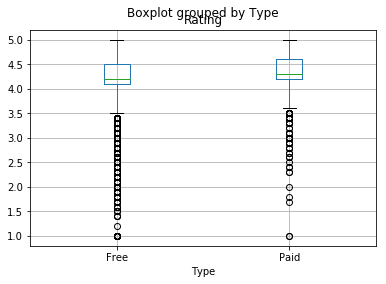

In [25]:
df.boxplot(column='Rating', by = 'Type')

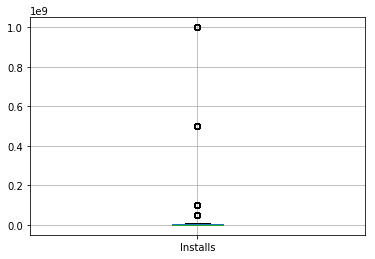

In [26]:
df.boxplot(column="Installs")

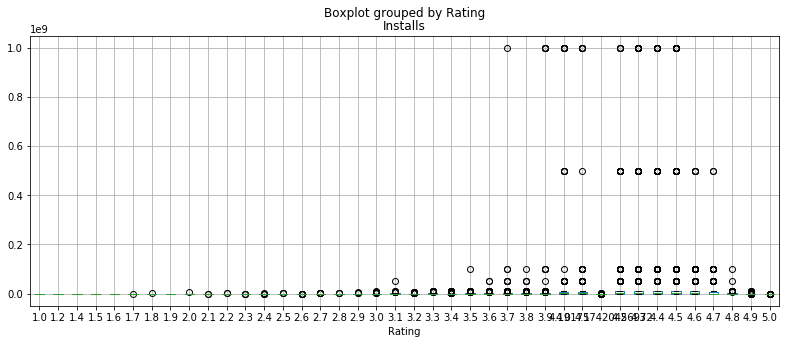

In [27]:
df.boxplot(column="Installs", by = "Rating", figsize=(13,5))

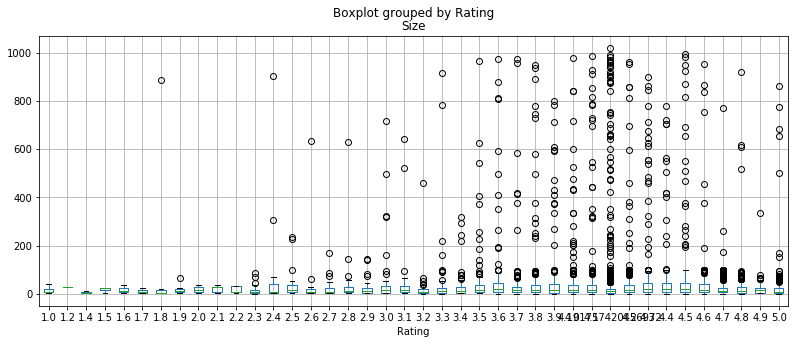

In [28]:
df.boxplot(column="Size", by = "Rating", figsize=(13,5))

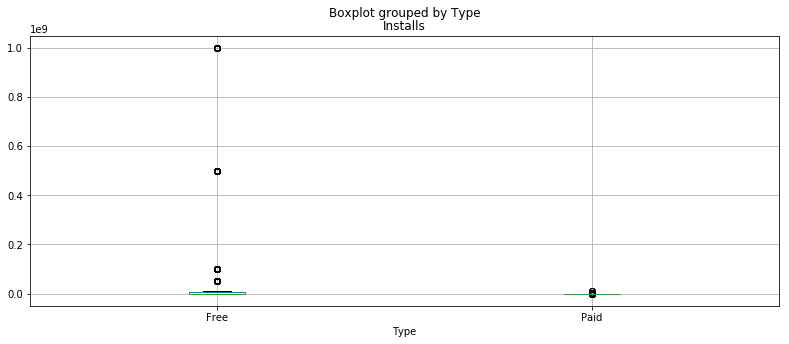

In [29]:
df.boxplot(column="Installs", by = "Type",figsize=(13,5))

In [30]:
#removing values based on the interquartile range, firsly finds the mean, then finds the lower quartile range and upper quartile range, a lower and upper inner fence and a lower and upper outer fence
#If a value exceeds both the lower and upper quartile ranges and the lower and upper inner fences, that data is classed as an outlier and will be removed using this data
#There are no outliers in this column so nothing was removed from the data

def remove_outlier(df_in, Rating):
    q1 = df_in[Rating].quantile(0.25)
    q3 = df_in[Rating].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[Rating] > fence_low) & (df_in[Rating] < fence_high)]
    return df_out

In [31]:
var_mod = ['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating',
           'Genres','Last Updated','Current Ver','Android Ver']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))


In [35]:
#Generic function for making a classification model and accessing performance:
#Creating the classification model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 10 folds
  kf = KFold(data.shape[0], n_folds=10)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


outcome_var = 'Rating'
model = LogisticRegression()
predictor_var = ['Installs','Reviews']
classification_model(model, df, predictor_var, outcome_var)



c:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy : 18.007%


TypeError: __init__() got an unexpected keyword argument 'n_folds'

AttributeError: 'ChiSquare' object has no attribute 'TestIndependence'